<a href="https://colab.research.google.com/github/Jhonatan19991/Proyecto-programacion/blob/main/programacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
datas = 1
datas

1

In [4]:
#carga de datos
datos = pd.read_csv("/content/data.csv")


##40Gb ram
#8 procesadores 3.2 Gz
#promedio porcentaje de ram y cpu

# crear una columna con la fecha y hora completa en formato "dd/mm/yyyy HH:MM:SS"
datos['Fecha_Hora'] = pd.to_datetime(datos['dia'].astype(str) + '/' + datos['mes'].astype(str) + '/2023 ' + datos['hora'].astype(str) + ':' + datos['minuto'].astype(str), format='%d/%m/%Y %H:%M') + pd.Timedelta(hours=2)


#separar fecha y hora_minuto en columnas distintas
datos['fecha'] = pd.to_datetime(datos['Fecha_Hora'], format='%d/%m/%Y %H:%M:%S').dt.strftime('%d/%m/%Y')
datos['hora_minuto'] = pd.to_datetime(datos['Fecha_Hora'], format='%d/%m/%Y %H:%M:%S').dt.strftime('%H:%M:%S')


#crear una columna con el día de la semana
datos['dia_semana'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y').dt.day_name()

datos = datos.drop(['dia_de_la_semana', 'dia', 'hora','minuto', 'Fecha_Hora', 'mes'], axis=1)

#separar hora_minuto en distintas columnas (hora, minuto, segundo)
datos[['hora', 'minuto', 'segundo']] = datos['hora_minuto'].str.split(':', expand=True)

#separar el numero de mes y el nombre del mes proveniente de la fecha en otra columna
datos['num_mes'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y').dt.month
datos['nombre_mes'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y').dt.month_name()

#segundos no es necesario, por ende, se elimina
datos = datos.drop('segundo', axis=1)
datos['fecha'] = pd.to_datetime(datos['fecha'], format='%d/%m/%Y')

#datos a excel
datos.to_excel('datos_paygo.xlsx', index=False)

datos

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
0,7.8,11.0,php,uwsgi,httpd,2023-03-13,17:19:00,Monday,17,19,3,March
1,13.6,8.6,uwsgi,python3,httpd,2023-03-13,17:24:00,Monday,17,24,3,March
2,10.4,8.4,uwsgi,python3,httpd,2023-03-13,17:27:00,Monday,17,27,3,March
3,10.1,8.4,uwsgi,python3,httpd,2023-03-13,17:30:00,Monday,17,30,3,March
4,8.7,8.4,uwsgi,python3,httpd,2023-03-13,17:33:00,Monday,17,33,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...
13421,29.3,40.6,httpd,python3,uwsgi,2023-04-10,16:24:00,Monday,16,24,4,April
13422,16.3,41.1,httpd,python3,uwsgi,2023-04-10,16:27:00,Monday,16,27,4,April
13423,20.2,42.2,httpd,python3,uwsgi,2023-04-10,16:30:00,Monday,16,30,4,April
13424,17.2,42.9,httpd,uwsgi,php,2023-04-10,16:33:00,Monday,16,33,4,April


In [5]:
datos[datos['cpu_percent'] >= 90]

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
4155,99.4,52.4,php,uwsgi,httpd,2023-03-22,09:06:00,Wednesday,09,06,3,March
4634,98.9,49.5,php,uwsgi,httpd,2023-03-23,09:03:00,Thursday,09,03,3,March
7032,90.9,41.1,php,uwsgi,python3,2023-03-28,08:57:00,Tuesday,08,57,3,March
12858,98.0,8.0,httpd,uwsgi,amazon-cloudwatch-agent,2023-04-09,12:15:00,Sunday,12,15,4,April
13115,91.6,10.2,httpd,uwsgi,php,2023-04-10,01:06:00,Monday,01,06,4,April


In [6]:
semana1 = datos[datos['fecha'] <= '17-03-2023']

semana1


<ipython-input-6-07f706e10b7e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  semana1 = datos[datos['fecha'] <= '17-03-2023']


,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
0,7.8,11.0,php,uwsgi,httpd,2023-03-13,17:19:00,Monday,17,19,3,March
1,13.6,8.6,uwsgi,python3,httpd,2023-03-13,17:24:00,Monday,17,24,3,March
2,10.4,8.4,uwsgi,python3,httpd,2023-03-13,17:27:00,Monday,17,27,3,March
3,10.1,8.4,uwsgi,python3,httpd,2023-03-13,17:30:00,Monday,17,30,3,March
4,8.7,8.4,uwsgi,python3,httpd,2023-03-13,17:33:00,Monday,17,33,3,March
...,...,...,...,...,...,...,...,...,...,...,...,...
2048,8.4,8.2,uwsgi,python3,httpd,2023-03-17,23:45:00,Friday,23,45,3,March
2049,8.8,8.4,uwsgi,python3,httpd,2023-03-17,23:48:00,Friday,23,48,3,March
2050,9.0,8.2,uwsgi,python3,httpd,2023-03-17,23:51:00,Friday,23,51,3,March
2051,10.5,8.3,uwsgi,python3,httpd,2023-03-17,23:54:00,Friday,23,54,3,March


<ipython-input-7-5050a4c94182>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semana1['fecha'] = semana1['fecha'].dt.strftime('%d/%m/%Y')
<ipython-input-7-5050a4c94182>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semana1['fechahora'] = semana1['fecha'] +' '+ semana1['hora_minuto']


<Axes: xlabel='fechahora', ylabel='cpu_percent'>

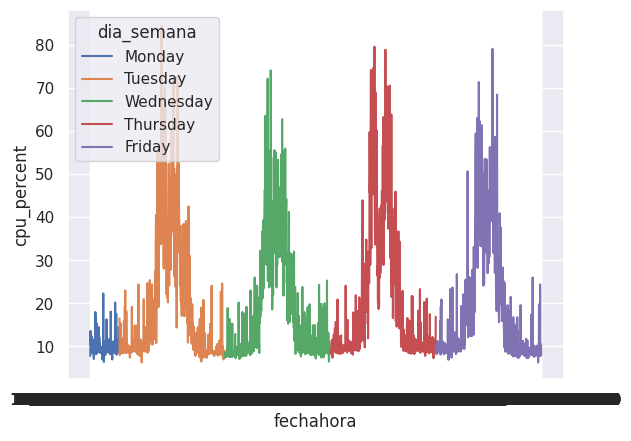

In [7]:
semana1['fecha'] = semana1['fecha'].dt.strftime('%d/%m/%Y')
semana1['fechahora'] = semana1['fecha'] +' '+ semana1['hora_minuto']
semana1
sns.set_theme(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x="fechahora", y="cpu_percent",hue ='dia_semana',
              
             data=semana1)

<ipython-input-8-21066358371f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunes1['timestamp'] = pd.to_datetime(lunes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-8-21066358371f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunes1['hora_minuto'] = pd.to_datetime(lunes1['timestamp']).dt.hour


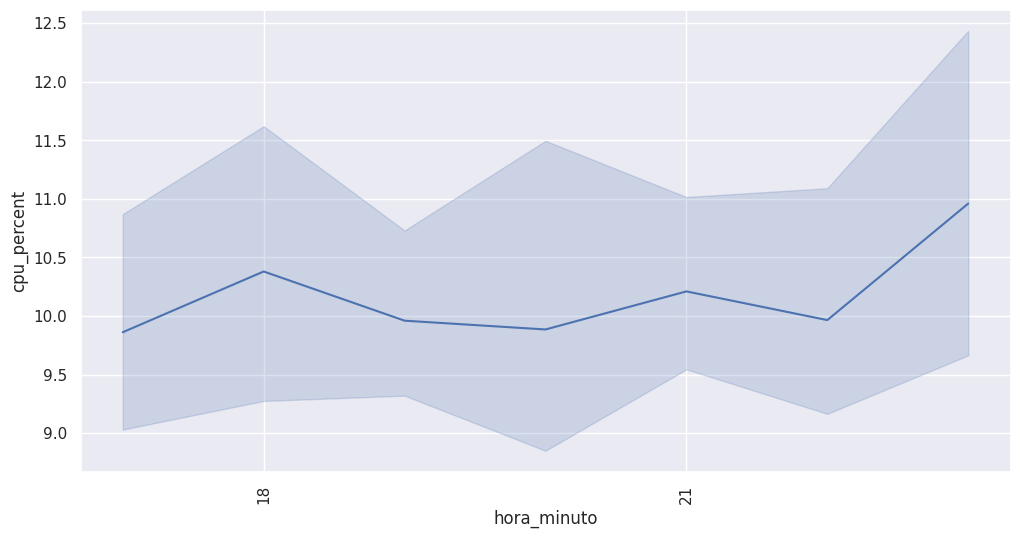

In [8]:
sns.set_theme(style="darkgrid")

lunes1 = semana1[semana1['dia_semana'] == 'Monday']
lunes1['timestamp'] = pd.to_datetime(lunes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
lunes1['hora_minuto'] = pd.to_datetime(lunes1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=lunes1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 



<ipython-input-12-9d574713668e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  martes1['timestamp'] = pd.to_datetime(martes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-12-9d574713668e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  martes1['hora_minuto'] = pd.to_datetime(martes1['timestamp']).dt.hour


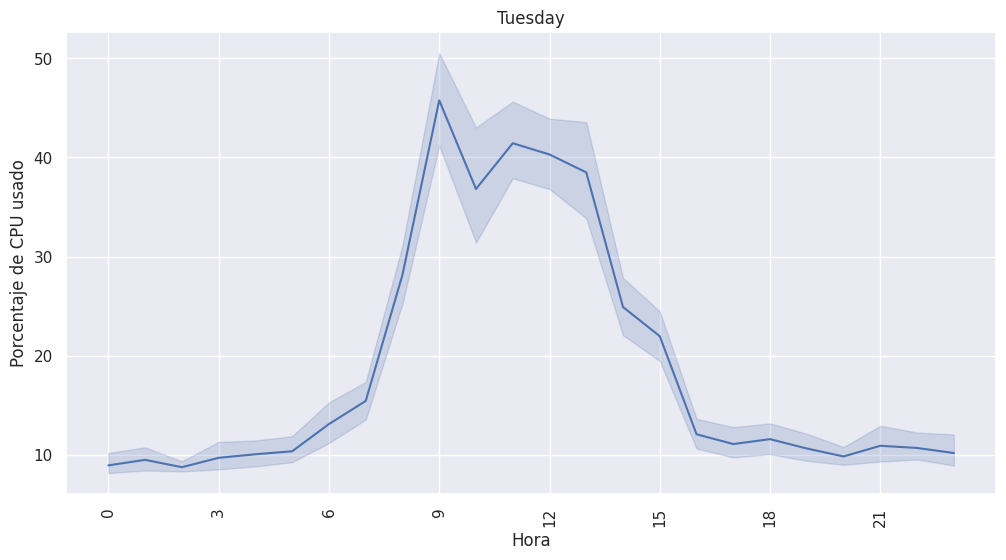

In [12]:
sns.set_theme(style="darkgrid")
martes1 = semana1[semana1['dia_semana'] == 'Tuesday']
martes1['timestamp'] = pd.to_datetime(martes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
martes1['hora_minuto'] = pd.to_datetime(martes1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=lunes1,)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Tuesday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 



<ipython-input-13-058b5a640f0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miercoles1['timestamp'] = pd.to_datetime(miercoles1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-13-058b5a640f0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miercoles1['hora_minuto'] = pd.to_datetime(miercoles1['timestamp']).dt.hour


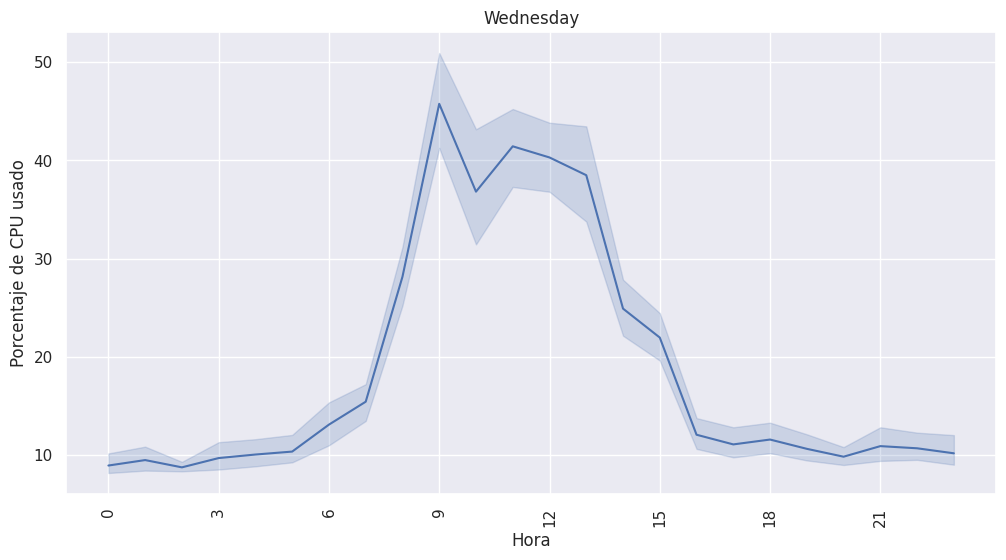

In [13]:
miercoles1 = semana1[semana1['dia_semana'] == 'Wednesday']
miercoles1['timestamp'] = pd.to_datetime(miercoles1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
miercoles1['hora_minuto'] = pd.to_datetime(miercoles1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=lunes1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Wednesday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 

<ipython-input-14-794b0f4db02c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jueves1['timestamp'] = pd.to_datetime(jueves1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-14-794b0f4db02c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jueves1['hora_minuto'] = pd.to_datetime(jueves1['timestamp']).dt.hour


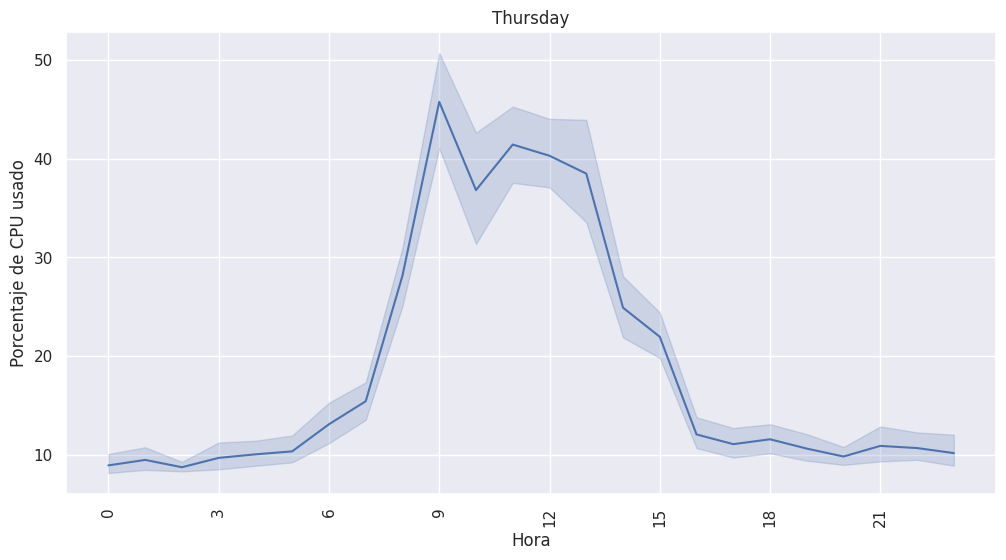

In [14]:
jueves1 = semana1[semana1['dia_semana'] == 'Thursday']
jueves1['timestamp'] = pd.to_datetime(jueves1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
jueves1['hora_minuto'] = pd.to_datetime(jueves1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=lunes1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Thursday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 

<ipython-input-15-5f357c678dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viernes1['timestamp'] = pd.to_datetime(viernes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
<ipython-input-15-5f357c678dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viernes1['hora_minuto'] = pd.to_datetime(viernes1['timestamp']).dt.hour


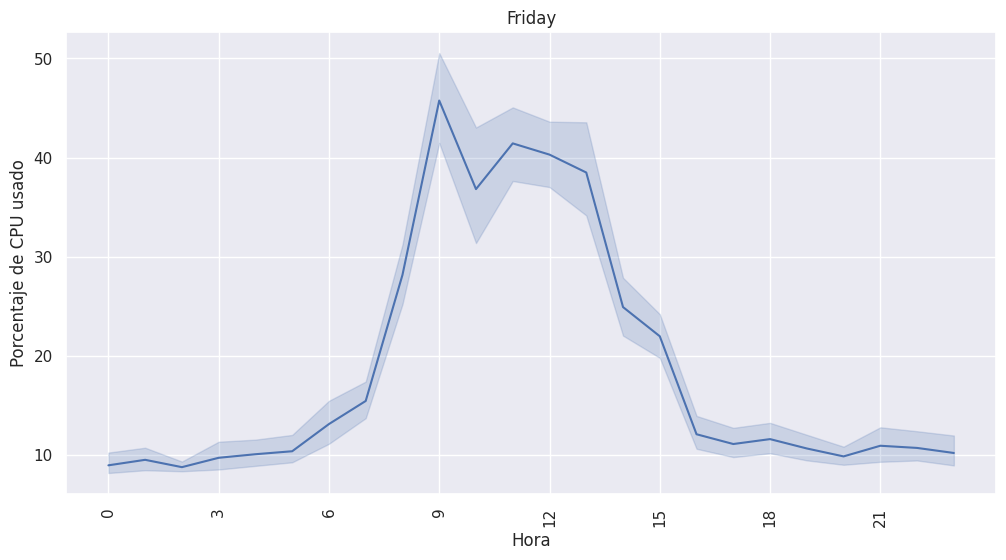

In [15]:
viernes1 = semana1[semana1['dia_semana'] == 'Friday']
viernes1['timestamp'] = pd.to_datetime(viernes1['fechahora'].str[:-3], format='%d/%m/%Y %H:%M')
viernes1['hora_minuto'] = pd.to_datetime(viernes1['timestamp']).dt.hour
sns.lineplot(x="hora_minuto", y="cpu_percent",
              
             data=lunes1)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10) 
plt.title("Friday")
plt.xlabel("Hora")
plt.ylabel("Porcentaje de CPU usado")

# ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(12, 6) 

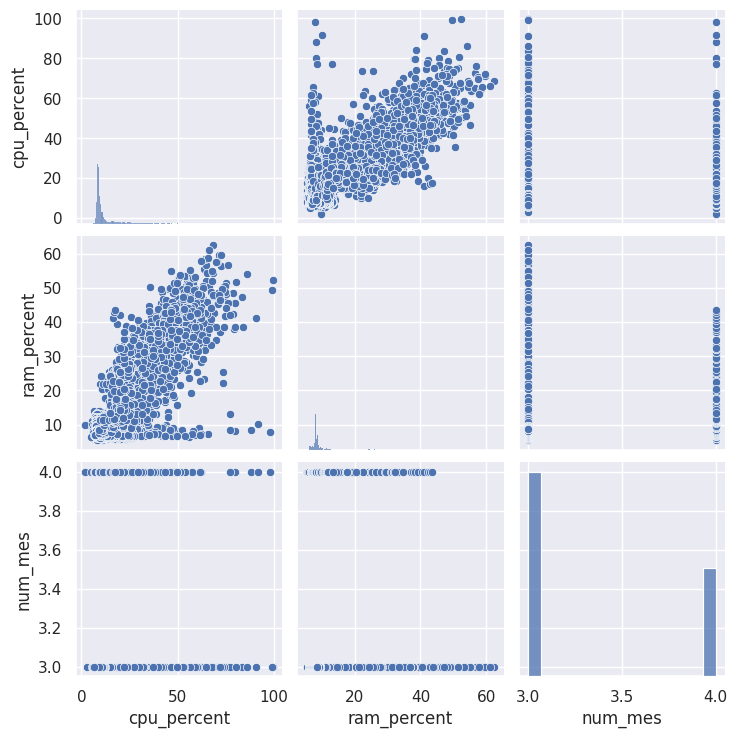

In [16]:
sns.pairplot(datos)

In [17]:
cpu_max = datos['cpu_percent'].max()
cpu_min = datos['cpu_percent'].min()
ram_max = datos['ram_percent'].max()
ram_min = datos['ram_percent'].min()
print(cpu_max, cpu_min, ram_max, ram_min)

99.4 1.9 62.4 5.4


In [18]:
#rango
rango_cpu = cpu_max - cpu_min
rango_ram = ram_max - ram_min
print(rango_cpu, rango_ram)

97.5 57.0


In [19]:
#Mediana de la cpu
median_cpu = datos['cpu_percent'].median()
median_cpu

9.5

In [20]:
#Mediana de la ram
median_ram = datos['ram_percent'].median()
median_ram

8.3

<function matplotlib.pyplot.show(close=None, block=None)>

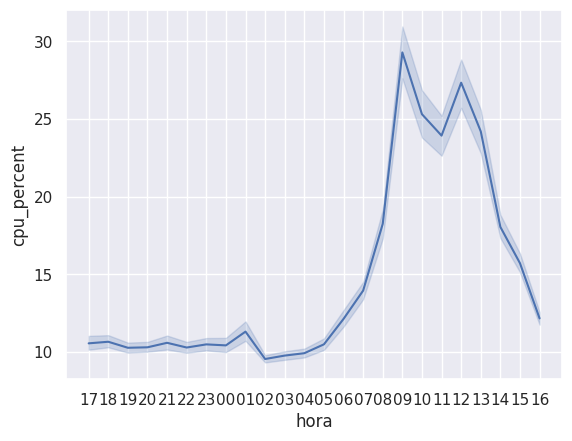

In [25]:
x = datos['hora']
y = datos['cpu_percent']
sns.lineplot(x= datos['hora'] , y = datos['cpu_percent'], data= datos)
plt.show

<Axes: xlabel='ram_percent'>

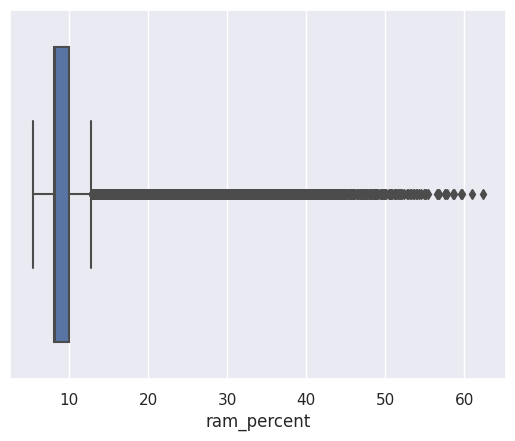

In [26]:
#Distribucion de la ram
sns.boxplot(x = 'ram_percent', data = datos)

<Axes: xlabel='cpu_percent'>

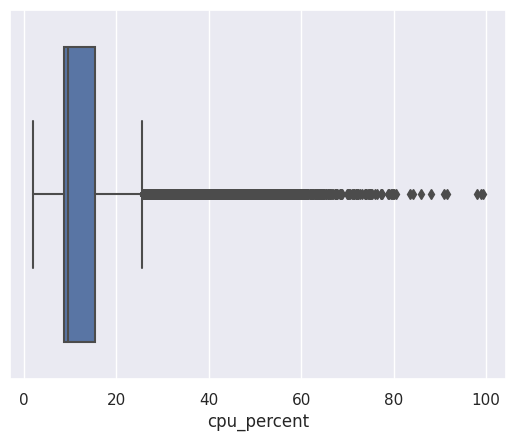

In [27]:
#distribucion de la cpu
sns.boxplot(x='cpu_percent', data= datos)

In [40]:
datos[datos['ram_percent'] > 57] 

,cpu_percent,ram_percent,top_1,top_2,top_3,fecha,hora_minuto,dia_semana,hora,minuto,num_mes,nombre_mes
1363,70.5,57.6,php,uwsgi,python3,2023-03-16,13:30:00,Thursday,13,30,3,March
1768,71.3,59.7,php,uwsgi,python3,2023-03-17,09:45:00,Friday,09,45,3,March
1829,64.4,58.5,php,uwsgi,python3,2023-03-17,12:48:00,Friday,12,48,3,March
3750,69.8,57.5,php,uwsgi,httpd,2023-03-21,12:51:00,Tuesday,12,51,3,March
4157,65.7,58.7,php,uwsgi,httpd,2023-03-22,09:12:00,Wednesday,09,12,3,March
4710,68.6,62.4,php,uwsgi,httpd,2023-03-23,12:51:00,Thursday,12,51,3,March
7519,72.3,59.6,php,uwsgi,python3,2023-03-29,09:18:00,Wednesday,09,18,3,March
7556,62.3,57.8,php,uwsgi,httpd,2023-03-29,11:09:00,Wednesday,11,09,3,March
7590,66.3,61.0,php,uwsgi,python3,2023-03-29,12:51:00,Wednesday,12,51,3,March


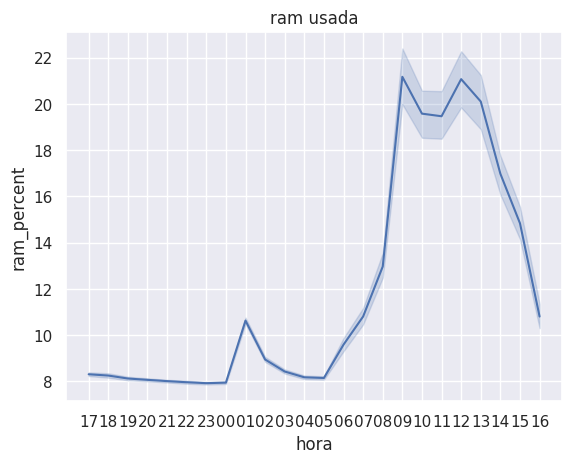

In [32]:
sns.lineplot(data = datos, y = "ram_percent", x= "hora")
plt.title("ram usada")
plt.show()

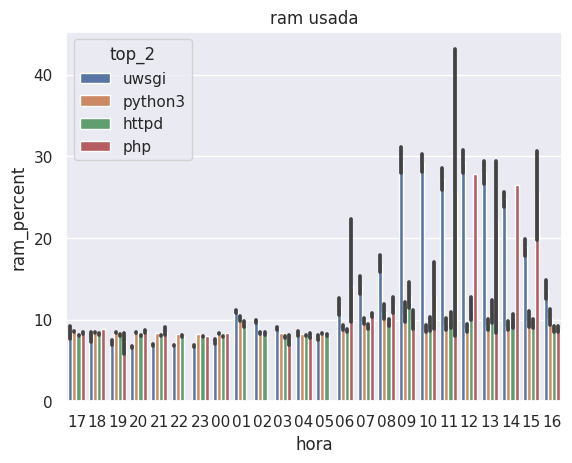

In [33]:
sns.barplot(data = datos, y = "ram_percent", x= "hora", hue= "top_2")
plt.title("ram usada")
plt.show()

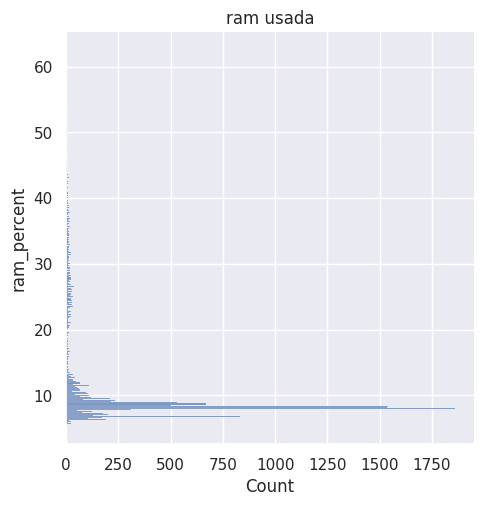

In [34]:
sns.displot(data = datos, y = "ram_percent",  )
plt.title("ram usada")
plt.show()

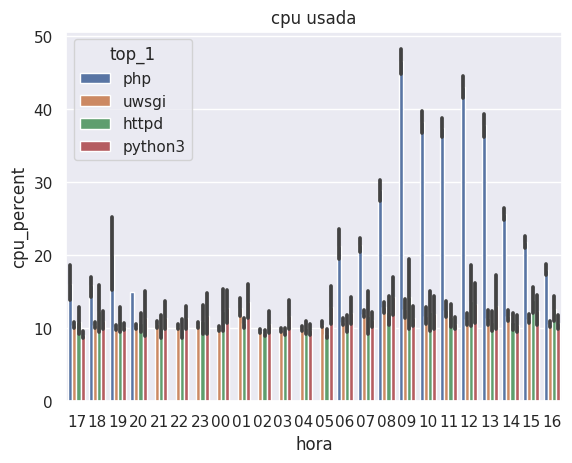

In [35]:
sns.barplot(data = datos, y = "cpu_percent", x= "hora", hue= "top_1")
plt.title("cpu usada")
plt.show()

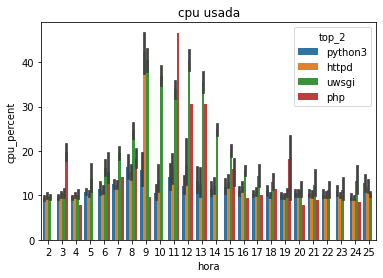

In [ ]:
sns.barplot(data = datos, y = "cpu_percent", x= "hora", hue= "top_2")
plt.title("cpu usada")
plt.show()

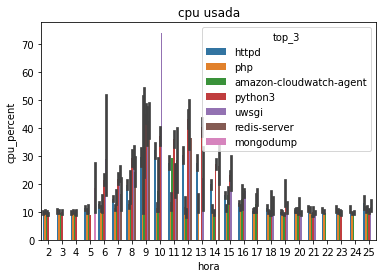

In [ ]:
sns.barplot(data = datos, y = "cpu_percent", x= "hora", hue= "top_3")
plt.title("cpu usada")
plt.show()

<Axes: xlabel='ram_percent', ylabel='cpu_percent'>

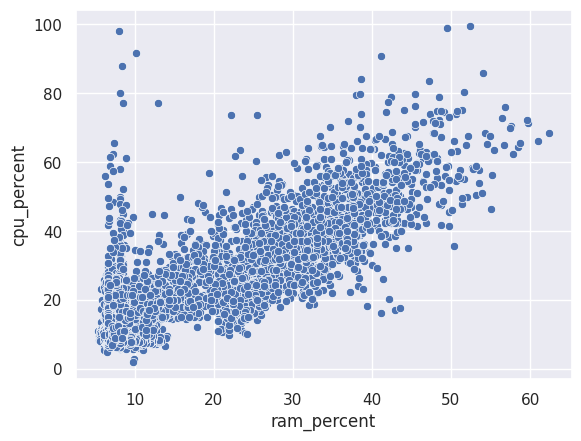

In [36]:
sns.scatterplot(data= datos, x = "ram_percent", y = "cpu_percent")

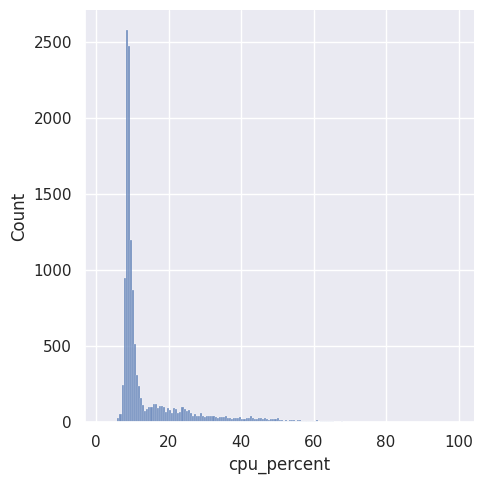

In [37]:
sns.displot(datos, x='cpu_percent', multiple='stack')

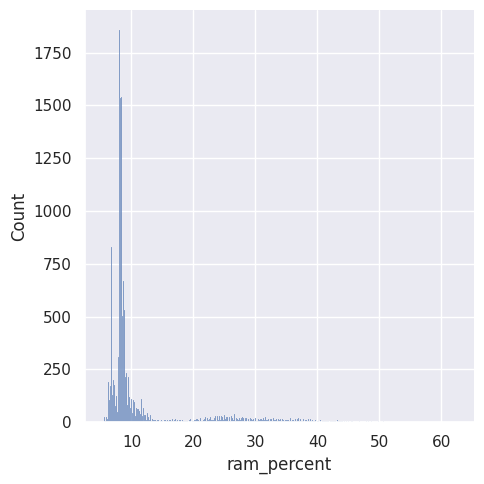

In [38]:
sns.displot(datos, x='ram_percent', multiple='stack')